In [18]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd
import numpy as np
%matplotlib notebook
from scipy.signal import lfilter

### Phasor

##### sinusoidal 을 만들어 내는 것이 phasor. 

In [19]:
# parameter setting
amp = 1          # range [0.0, 1.0]
#amplitude, 진폭
#sine wave, 음의 높낮이(frequency), 음의 강도(진폭)와 관련이 있다. 
sr = 10000       # sampling rate, Hz
#1초에 몇 개의 숫자로 이루어져 있는가? --> Hz. 숫자가 단순히 몇 개가 나오는지? 
dur = 0.5        # in seconds, 정의하지 않으면 무한대로 간다. 
freq = 100.0     # frequency, Hz
#sine파가 왕복하는 주기. 1초에 100번 왕복한다면 100Hz, 싸이클의 횟수를 말한다. 
#sampling rate의 Hz와는 같은 표기이지만 다른 의미.
#목소리가 높으면 high frequency, 주파수, 음의 높낮이를 measure할 때 사용.

In [20]:
# generate time
t = np.arange(1, sr * dur+1)/sr
t
#1부터 5000까지 만들고, 그걸 10000으로 나눈다. 
#arange 함수는 (1,3)이라면 1이상 3미만을 말한다. 이를 보완해주기 위해서는 +1
#1/10000초부터 5000/10000초까지 나눈 것

#sine 함수는 시간이 없어도 만들어질 수 있지만, 그걸 실체화하기 위해서는 시간이 먼저 정의되어야 한다.
#정의된 시간 안에서 frequency가 정의되어야 plot할 수 있다. 

array([1.000e-04, 2.000e-04, 3.000e-04, ..., 4.998e-01, 4.999e-01,
       5.000e-01])

In [21]:
# generate phase
theta = t * 2*np.pi * freq
len(theta)
#sine 함수는 radian, 각도 값을 받아들인다. 시간이 각도가 될 수는 없다.
#그러나 frequency는 관계가 있도록 만들어준다. 
#시간과 각도 값을 교묘하게 합쳐지게 만든다. 
#t와 theta의 length는 같다. 

5000

In [22]:
# generate signal by cosine-phasor
s = amp * np.sin(theta)
len(s)
#sine 함수에는 각도가 들어와야 한다. radian. 0도면 0, 360이면 2ㅠ
#대신 각도를 직접 받지 않고 그 각도를 radian의 형태로 받아야 한다. 
#이 경우에도 각각의 theta값이 s로 받아지기 때문에 length는 같다. 

#signal = time series = 

5000

<IPython.core.display.Javascript object>


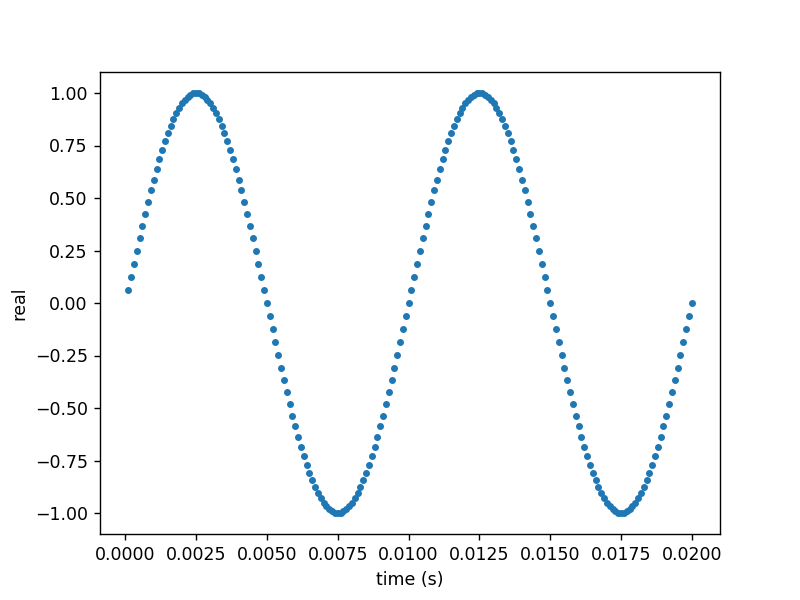

Text(0, 0.5, 'real')

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.plot(t, s, '.')
#plotting을 하는 데는 theta가 쓰이지 않는다. 
#x축은 시간, y축은 sine의 결과값
#점의 개수 = t = theta = s. 결과값이 하나하나 찍힌 것이다. 개수가 동일. 
#sample값이 많을 수록 점이 많이 찍혀서 점점 직선처럼 보일 것이다.

ax.plot(t[0:200], s[0:200], '.')
#5000개를 다 찍기엔 너무 많으니 첫 200개만 찍어 보자. '.'으로 나타낼 것

ax.set_xlabel('time (s)') #x축의 레이블을 적어 준다. 
ax.set_ylabel('real') #y축의 레이블을 적어 준다. 

#sampling rate가 10000일 때와 5000일 때를 비교해 보면: 
#10000일 때가 훨씬 촘촘하게 나올 것이다. 
#그러나 plot을 할 때 보여질 샘플의 개수를 정해주는 것이기 때문에 그래프에 보여지는 점의 총 개수는 같다.
#10000일 때는 더 짧은 시간 내에 샘플이 나오게 될 것이다. 

#frequency가 100일 때와 200일 때를 비교해 보면:
#100일 때는 1초에 sine wave가 한 개 만들어진다면 200일 때는 2개 만들어진다. 

In [7]:
ipd.Audio(s, rate = sr)
#sound를 play하고 싶다면 ipd를 사용한다. 
#frequency가 1이라면 절대 들리지 않는다. 200정도는 되어야 들릴 것. 

In [25]:
# generate signal by complex-phasor
c = amp * np.exp(theta * 1j)

#np.exp가 e, ()안에 들어가는 것이 e의 지수가 될 것. 
#sin(theta)를 exp(theta*1j)로 만들면, 이 값은 복소수로 a+bj의 형태로 계산될 수 있다.
#이 복소수는 2차 평면에 plot될 수 있는데(Re(실수부), Im(허수부)), 이 값은 원을 그리며 중복된 값을 나타낼 것. 
#theta의 vector 개수와 c vector의 개수는 같다. c는 복소수. 

<IPython.core.display.Javascript object>


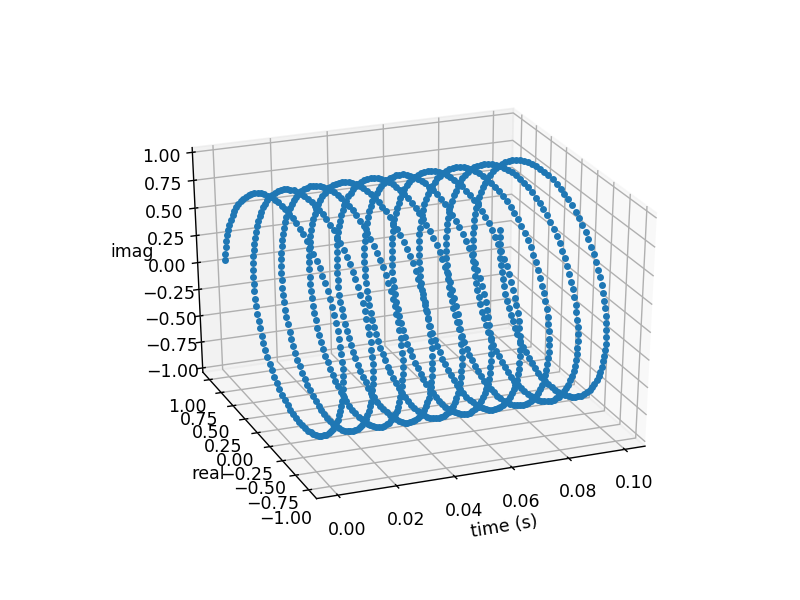

Text(0.5, 0, 'imag')

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '.') #이 부분이 중요하다.
#c.real[] 부분이 실수부(complex number의 a부분), c.imag[] 부분이 허수부(complex number의 b부분). 

ax.set_xlabel('time (s)') #각 축의 이름을 적어준다. 
ax.set_ylabel('real')
ax.set_zlabel('imag')
#3차원으로 plot한다. x축은 시간축, y축은 실수부, z축은 허수부

#그래프를 드래그하면 그 방향으로 돌아간다. 각 부분을 집중적으로 볼 수 있다. 
#허수부만 투영해서 보면 sine 함수가 보이고, 실수부를 투영해서 보면  cosine 함수가 보이게 될 것이다. --> Projection

In [10]:
ipd.Audio(s, rate = sr)

### Generate pulse train

<IPython.core.display.Javascript object>


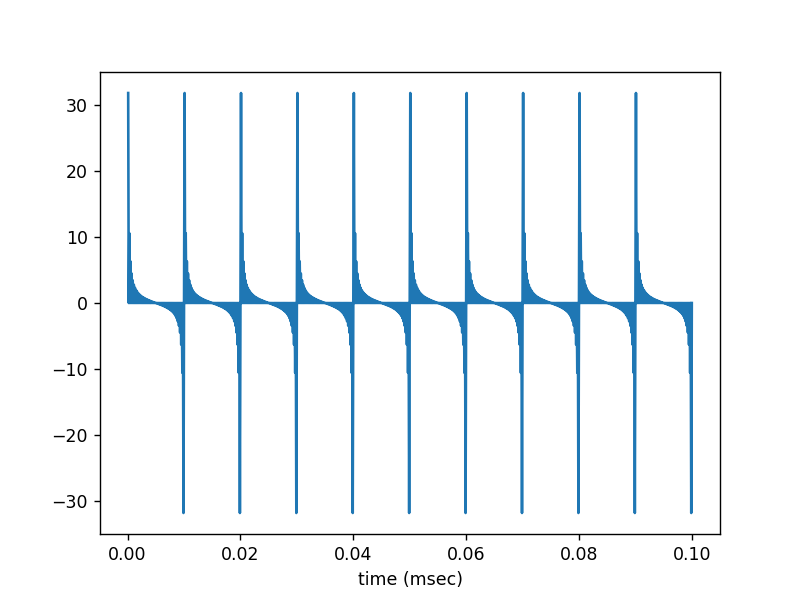

Text(0.5, 0, 'time (msec)')

In [27]:
# generate samples, note conversion to float32 array
#여러개의 sine wave 가 합쳐지면 이런 그래프가 나올 것. 이걸 만드는 방법은 for문을 활용한다. 

F0 = 100 #100부터
Fend = int(sr/2) #5000까지
s = np.zeros(len(t)) #s는 0으로 초기화. 앞으로 만들어지는 signal 값을 더해주기 위한 변수이다. 

for freq in range(F0, Fend+1, F0):    #range(어디서부터, 어디까지, 얼만큼 증가시킨다). 마지막 숫자도 포함시키기 위해서 +1을 해준다. 
    theta = t * 2*np.pi * freq
    tmp = amp * np.sin(theta)
    s = s + tmp
#t는 위에서 정한 것을 그대로 사용. 
#한 번 돌 때의 signal 값은 tmp로 임시 저장되고, 그게 여러번 반복이 되면서 s에 누적되어 저장이 될 것이다. 

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000]); 
ax.set_xlabel('time (msec)')

In [13]:
ipd.Audio(s, rate = sr)